# OUTLIER DETECTION

In [2]:
#I AM CREATING THREE DIFFERENT FUNCTIONS THAT CAN PERFORM THE TASK

import warnings
warnings.filterwarnings("ignore")

#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [3]:
#this github link has the wine dataset that i will be using in this notebook
url = 'https://raw.githubusercontent.com/epicure24/Datasets/master/wine_data.csv'

In [4]:
# uploading wine dataset
data = pd.read_csv(url,error_bad_lines=False)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# statistical data for every feature
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# 'quality' is the target feature, thus separating it from the rest of the data
labels = data['quality']
df = data.drop(['quality'], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


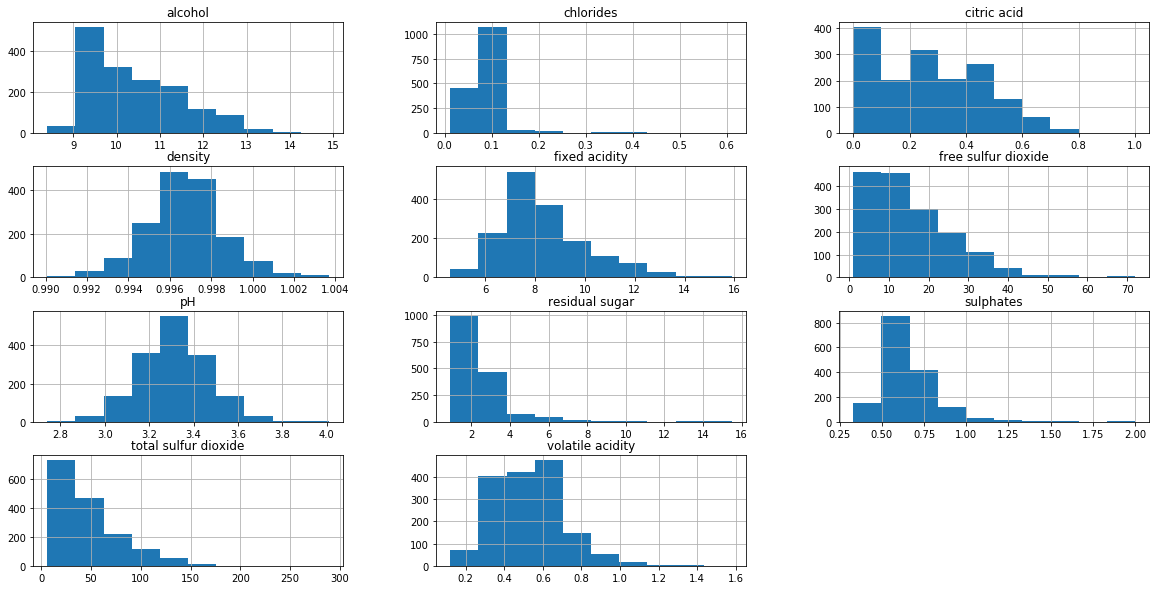

In [7]:
#plotting the histogram of every feature to see the distribution of every feature 
df.hist(figsize=(20,10))
plt.show()

Through the plottings we can see that most of the features follows normal distribution i.e. gaussian distribution, hence we can apply simple statistical outlier detection methods like interquartile, standard deviation, z_score and isolationforest of sklearn. As it is written in the question not to use multivariate methods thats why i am skipping dbscan or lof. 

# Interquartile method

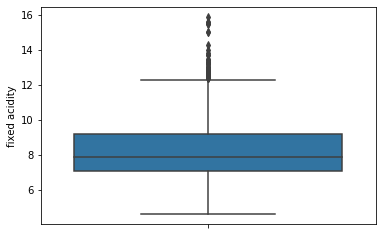

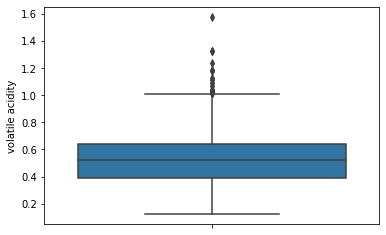

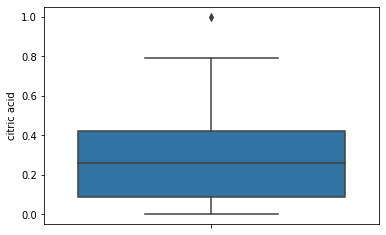

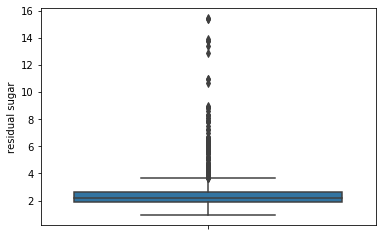

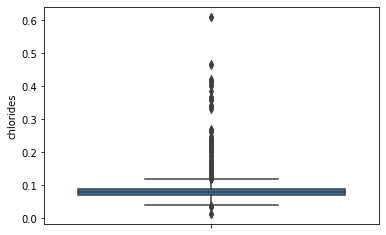

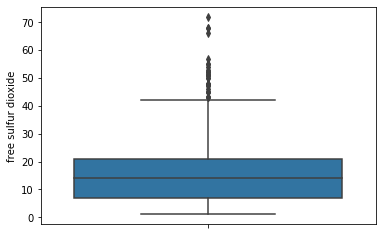

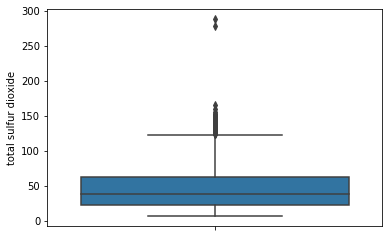

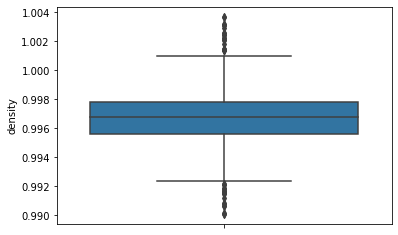

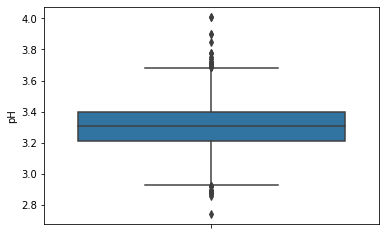

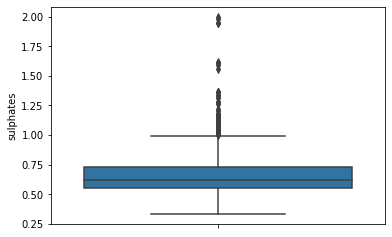

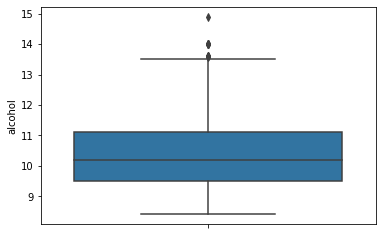

In [8]:
# creating boxplots to see the outliers 
for index, rows in df.iteritems():
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[index])

From the above plots we can draw following conclusions:-

**Fixed acidity** - has outliers in upper quartile and almost no in lower quartile

**Volatile acidity** - outliers in upper quartile

**Citric Acid** - less outliers in upper quartile

**residual sugar** - have more outliers in upper quartile

**chlorides** - more outliers in upper quartile and less in lower quartile

**free sulphur dioxide** - outliers in upper quartile

**total sulphur dioxide** - outliers in upper quartile 

**density** - outliers almost equal (apparantly) in lower and upper quartile.

**pH** - outliers more in upper than lower

**sulphates** - outliers in upper quartile

**alcohol** - less outliers compared to others

In [9]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(data, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

In [10]:
#applying the above function on columns to find the total outliers in every feature
for i in df.columns:
  print('Total outliers in ', i)
  calc_interquartile(df, i)
  print()

Total outliers in  fixed acidity
Lower outliers 0
Upper outliers 49
total outliers 49

Total outliers in  volatile acidity
Lower outliers 0
Upper outliers 19
total outliers 19

Total outliers in  citric acid
Lower outliers 0
Upper outliers 1
total outliers 1

Total outliers in  residual sugar
Lower outliers 0
Upper outliers 155
total outliers 155

Total outliers in  chlorides
Lower outliers 9
Upper outliers 103
total outliers 112

Total outliers in  free sulfur dioxide
Lower outliers 0
Upper outliers 30
total outliers 30

Total outliers in  total sulfur dioxide
Lower outliers 0
Upper outliers 55
total outliers 55

Total outliers in  density
Lower outliers 21
Upper outliers 24
total outliers 45

Total outliers in  pH
Lower outliers 14
Upper outliers 21
total outliers 35

Total outliers in  sulphates
Lower outliers 0
Upper outliers 59
total outliers 59

Total outliers in  alcohol
Lower outliers 0
Upper outliers 13
total outliers 13



Hence our numerical results matches with the graphical results. Let's plot the data without outliers.

Lower outliers 0
Upper outliers 59
total outliers 59
0.9999999999999999 0.28000000000000014


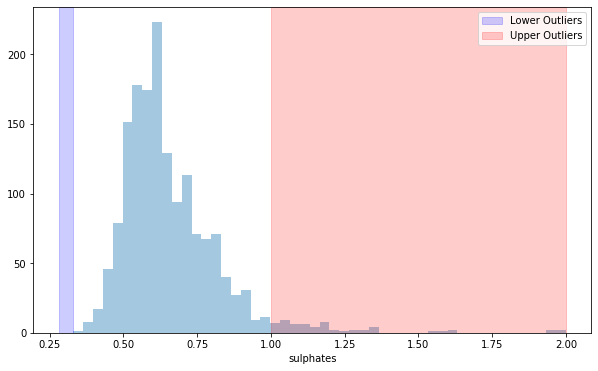

In [11]:
#plotting graph for 'sulphates' feature 
calc_interquartile(df, 'sulphates')
plt.figure(figsize = (10,6))
sns.distplot(data['sulphates'], kde=False)
print(upper, lower)
plt.axvspan(xmin = lower,xmax= data['sulphates'].min(),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = upper,xmax= data['sulphates'].max(),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

# z score Method

In [12]:
""" creating function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then that data point is an outlier"""

def z_score(data, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(data[column])
    # calculating the standard deviation of the passed column
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 27


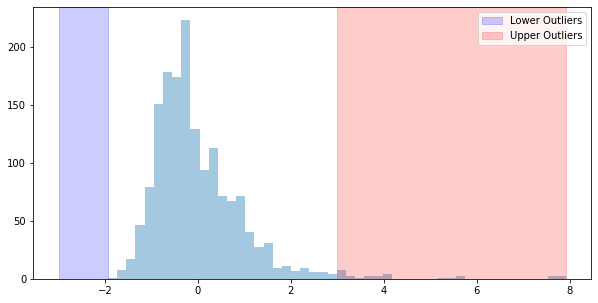

In [13]:
#Plotting the outlier graph for 'alcohol' feature
z_score(df, 'sulphates')
plt.figure(figsize = (10,5))
sns.distplot(zscore, kde=False)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

# IsolationForest method

In [14]:
#using sklearn's isolationforest methods to remove outliers
iso = IsolationForest(contamination=0.1)
outlier = iso.fit_predict(df)

/home/peepstake/.local/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [15]:
#mask variable contains all the outliers
mask = outlier == -1
#task variable contains all the non-outliers data
task = outlier != -1
#creating dataframe containing outliers
df_1 = df[mask]
#creating dataframe containing non-outliers
df_2 = df[task]

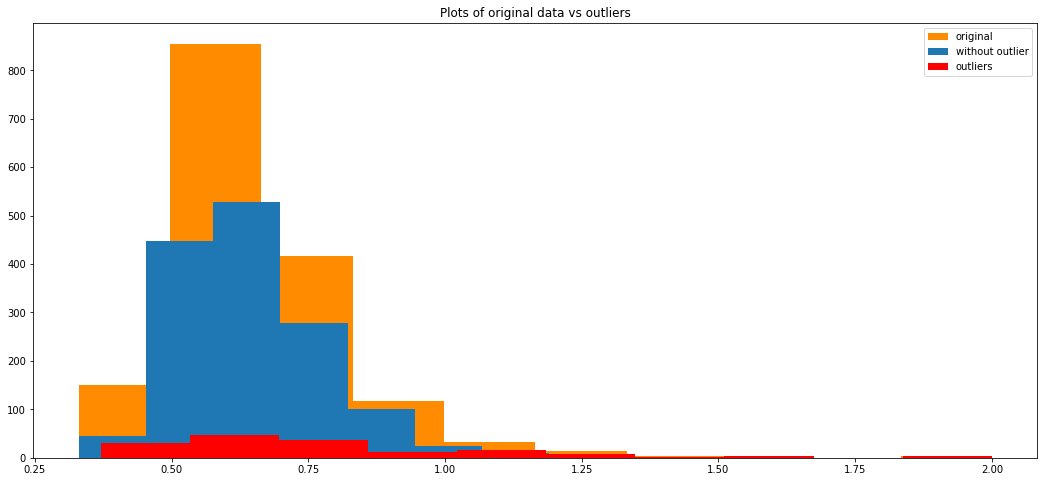

In [16]:
#plotting graph to show the original data, outliers and non-outliers 
plt.figure(figsize=(18, 8))
plt.title('Plots of original data vs outliers')
plt.hist(df['sulphates'], label= 'original', color='darkorange')
plt.hist(df_2['sulphates'], label='without outlier')
plt.hist(df_1['sulphates'], label='outliers', color='red')
plt.legend()
plt.show()

# Write a function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85

In [17]:
#USING THE SAME WINE DATASET FOR THIS QUESTION ALSO

#importing stats library
from scipy.stats.stats import pearsonr

In [18]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
#creating the function that takes datarame and returns the dataframe with dropped columns

def pears_function(data):
    #list to store columns to be deleted
    high_cols =[]
    #iterating through columns
    for i in data.columns:
        for j in data.columns:
            if i!=j:
                #print("corr. between {} and {}".format(i, j))
                #calculating pearson relation between different variables and storing first value in p
                p = pearsonr(data[i],data[j])[0]
                #print(p)
                # if p is more than 0.85 store both the columns in list
                if p>0.85:
                    high_cols.append(i) 
                    high_cols.append(j)
    #print(high_cols)
    #dropping columns and returning dataframes
    return data.drop(high_cols, axis=1) 

In [20]:
pears_function(data).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This dataset contains no columns that have correlation greater than 0.85

In [23]:
#CREATING DUMMY DATASET 
np.random.seed(42)
cols=8
#creating 8 columns filled with random values of maximum value of 20 
data = pd.DataFrame(np.random.rand(1000, cols)*20, columns=['column{}'.format(i) for i in range(cols)])

#creating 2 columns that are highly correlated to check the function
#column8 will have the values of column0 multiplied with 2 and column9 will have the values of column3 multiplied with 0.5
data['column8'] = data.column0*2
data['column9'] = data.column3*0.5
data.head()

,column0,column1,column2,column3,column4,column5,column6,column7,column8,column9
0,7.490802,19.014286,14.639879,11.973170,3.120373,3.119890,1.161672,17.323523,14.981605,5.986585
1,12.022300,14.161452,0.411690,19.398197,16.648853,4.246782,3.636499,3.668090,24.044600,9.699099
2,6.084845,10.495129,8.638900,5.824583,12.237058,2.789877,5.842893,7.327237,12.169690,2.912291
3,9.121400,15.703519,3.993476,10.284689,11.848291,0.929008,12.150897,3.410482,18.242799,5.142344
4,1.301032,18.977711,19.312641,16.167947,6.092275,1.953442,13.684661,8.803050,2.602064,8.083973


In [24]:
#applying pears_function on this dummy dataset in which OUTPUT SHOULD DEFINITELY REMOVE column8 , column0 , column3 and column9

pears_function(data)

,column1,column2,column4,column5,column6,column7
0,19.014286,14.639879,3.120373,3.119890,1.161672,17.323523
1,14.161452,0.411690,16.648853,4.246782,3.636499,3.668090
2,10.495129,8.638900,12.237058,2.789877,5.842893,7.327237
3,15.703519,3.993476,11.848291,0.929008,12.150897,3.410482
4,18.977711,19.312641,6.092275,1.953442,13.684661,8.803050
...,...,...,...,...,...,...
995,6.298665,2.579578,11.966122,0.619412,5.497913,0.655997
996,17.902001,19.653048,3.232754,18.116988,10.324956,3.074986
997,15.149381,14.634105,4.006796,4.220134,13.765860,4.394455
998,15.640037,15.679050,15.843799,16.772436,13.095515,4.568517


In [25]:
#CHECKING THE PEARSON RELATION OF THE DELETED COLUMNS
c = [0,3,8,9]

for i in c:
  for j in c:
    if i!=j:
      c1 = 'column{}'.format(i)
      c2 = 'column{}'.format(j)
      print('pearson relation between {} and {}'.format(c1,c2), pearsonr(data[c1], data[c2])[0])
      print()

pearson relation between column0 and column3 -0.014907746054315468

pearson relation between column0 and column8 1.0

pearson relation between column0 and column9 -0.014907746054315468

pearson relation between column3 and column0 -0.014907746054315468

pearson relation between column3 and column8 -0.014907746054315468

pearson relation between column3 and column9 1.0

pearson relation between column8 and column0 1.0

pearson relation between column8 and column3 -0.014907746054315468

pearson relation between column8 and column9 -0.014907746054315468

pearson relation between column9 and column0 -0.014907746054315468

pearson relation between column9 and column3 1.0

pearson relation between column9 and column8 -0.014907746054315468



**HENCE OUR FUNCTION IS WORKING PROPERLY**